In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("DUQ_Hourly.csv")
data

,Datetime,DUQ_MW
0,2005-12-31 01:00:00,1458.0
1,2005-12-31 02:00:00,1377.0
2,2005-12-31 03:00:00,1351.0
3,2005-12-31 04:00:00,1336.0
4,2005-12-31 05:00:00,1356.0
...,...,...
119063,2018-01-01 20:00:00,1962.0
119064,2018-01-01 21:00:00,1940.0
119065,2018-01-01 22:00:00,1891.0
119066,2018-01-01 23:00:00,1820.0


In [4]:
data.head()

,Datetime,DUQ_MW
0,2005-12-31 01:00:00,1458.0
1,2005-12-31 02:00:00,1377.0
2,2005-12-31 03:00:00,1351.0
3,2005-12-31 04:00:00,1336.0
4,2005-12-31 05:00:00,1356.0


In [5]:
data.tail()

,Datetime,DUQ_MW
119063,2018-01-01 20:00:00,1962.0
119064,2018-01-01 21:00:00,1940.0
119065,2018-01-01 22:00:00,1891.0
119066,2018-01-01 23:00:00,1820.0
119067,2018-01-02 00:00:00,1721.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119068 entries, 0 to 119067
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  119068 non-null  object 
 1   DUQ_MW    119068 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.8+ MB


In [7]:
data.isnull().sum()

Datetime    0
DUQ_MW      0
dtype: int64

In [8]:
data.shape

(119068, 2)

In [9]:
data.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


In [10]:
duplicates=data[data["Datetime"].duplicated()]
print(duplicates)

                   Datetime  DUQ_MW
80287   2014-11-02 02:00:00  1240.0
89071   2015-11-01 02:00:00  1138.0
97711   2016-11-06 02:00:00  1107.0
106519  2017-11-05 02:00:00  1105.0


In [11]:
data=data.drop_duplicates(subset="Datetime",keep="first")
data

,Datetime,DUQ_MW
0,2005-12-31 01:00:00,1458.0
1,2005-12-31 02:00:00,1377.0
2,2005-12-31 03:00:00,1351.0
3,2005-12-31 04:00:00,1336.0
4,2005-12-31 05:00:00,1356.0
...,...,...
119063,2018-01-01 20:00:00,1962.0
119064,2018-01-01 21:00:00,1940.0
119065,2018-01-01 22:00:00,1891.0
119066,2018-01-01 23:00:00,1820.0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119064 entries, 0 to 119067
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  119064 non-null  object 
 1   DUQ_MW    119064 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.7+ MB


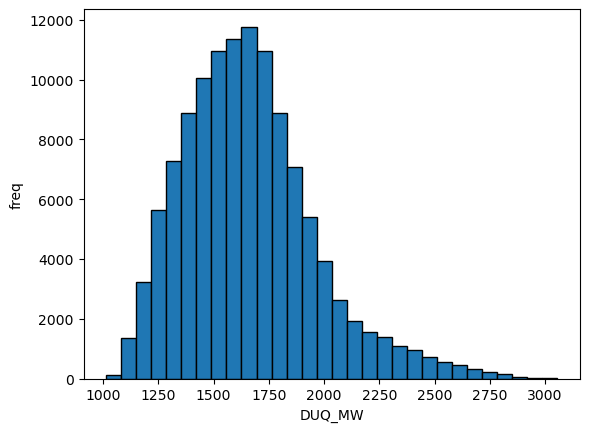

In [13]:
#checking skewness of data
plt.hist(data["DUQ_MW"],bins=30,edgecolor='black')     
plt.xlabel('DUQ_MW')
plt.ylabel('freq')
plt.show()

In [14]:
#using IQR to find outliers
q1=data["DUQ_MW"].quantile(0.25)
q3=data["DUQ_MW"].quantile(0.75)
IQR=q3-q1
lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR
outliers=data[(data["DUQ_MW"]<=lower_bound)|(data["DUQ_MW"]>=upper_bound)]
outliers

,Datetime,DUQ_MW
2556,2005-09-16 14:00:00,2391.0
2557,2005-09-16 15:00:00,2417.0
2558,2005-09-16 16:00:00,2427.0
2559,2005-09-16 17:00:00,2434.0
2560,2005-09-16 18:00:00,2382.0
...,...,...
115509,2018-05-29 17:00:00,2590.0
115510,2018-05-29 18:00:00,2572.0
115511,2018-05-29 19:00:00,2536.0
115512,2018-05-29 20:00:00,2435.0


In [15]:
outliers.count()

Datetime    3391
DUQ_MW      3391
dtype: int64

<Axes: xlabel='DUQ_MW'>

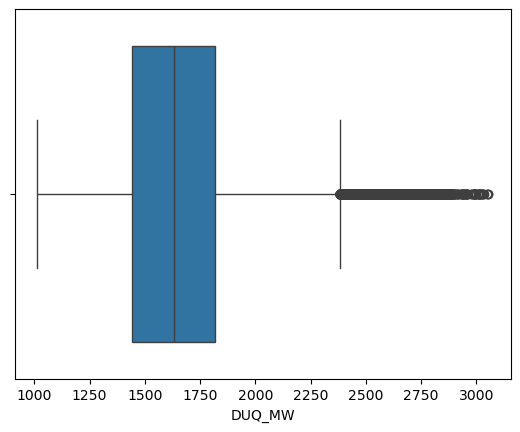

In [16]:
sns.boxplot(x=data["DUQ_MW"])

In [17]:
#capping extreme values
from scipy.stats.mstats import winsorize
data["DUQ_MW"]=winsorize(data["DUQ_MW"],limits=[0.01,0.02])

In [18]:
q1=data["DUQ_MW"].quantile(0.25)
q3=data["DUQ_MW"].quantile(0.75)
IQR=q3-q1
lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR
outliers_new=data[(data["DUQ_MW"]<=lower_bound)|(data["DUQ_MW"]>=upper_bound)]
outliers_new

,Datetime,DUQ_MW
2556,2005-09-16 14:00:00,2391.0
2557,2005-09-16 15:00:00,2417.0
2558,2005-09-16 16:00:00,2427.0
2559,2005-09-16 17:00:00,2434.0
2560,2005-09-16 18:00:00,2382.0
...,...,...
115509,2018-05-29 17:00:00,2455.0
115510,2018-05-29 18:00:00,2455.0
115511,2018-05-29 19:00:00,2455.0
115512,2018-05-29 20:00:00,2435.0


In [19]:
outliers_new.count()

Datetime    3391
DUQ_MW      3391
dtype: int64

<Axes: xlabel='DUQ_MW'>

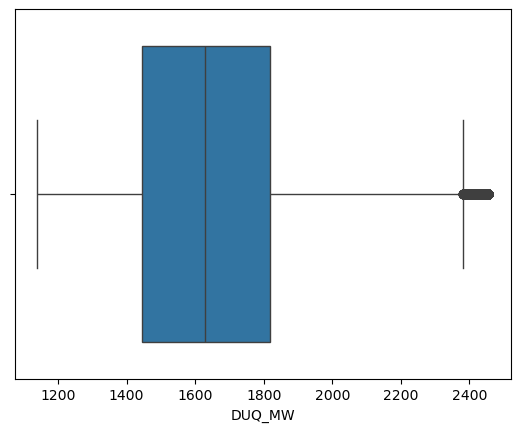

In [20]:
sns.boxplot(x=data["DUQ_MW"])

In [21]:
data["Datetime"]=pd.to_datetime(data["Datetime"])
data.set_index("Datetime",inplace=True)
data.sort_index(inplace=True)
data=data.asfreq('h')

In [22]:
data.head(48)

,DUQ_MW
Datetime,
2005-01-01 01:00:00,1364.0
2005-01-01 02:00:00,1273.0
2005-01-01 03:00:00,1218.0
2005-01-01 04:00:00,1170.0
2005-01-01 05:00:00,1166.0
2005-01-01 06:00:00,1181.0
2005-01-01 07:00:00,1215.0
2005-01-01 08:00:00,1258.0
2005-01-01 09:00:00,1270.0


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119088 entries, 2005-01-01 01:00:00 to 2018-08-03 00:00:00
Freq: h
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   DUQ_MW  119064 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


In [24]:
data["DUQ_MW"].isna().sum()

24

In [25]:
data[data["DUQ_MW"].isna()]

,DUQ_MW
Datetime,
2005-04-03 03:00:00,NaN
2005-10-30 02:00:00,NaN
2006-04-02 03:00:00,NaN
2006-10-29 02:00:00,NaN
2007-03-11 03:00:00,NaN
2007-11-04 02:00:00,NaN
2008-03-09 03:00:00,NaN
2008-11-02 02:00:00,NaN
2009-03-08 03:00:00,NaN


In [26]:
data["year"]=data.index.year
data["month"]=data.index.month
data["weekday"]=data.index.weekday
avg=data.groupby(['year','month','weekday'])["DUQ_MW"].transform('mean')
data["DUQ_MW"]=data["DUQ_MW"].fillna(avg)

In [27]:
data["DUQ_MW"].isna().sum()

0

In [28]:
data

,DUQ_MW,year,month,weekday
Datetime,,,,
2005-01-01 01:00:00,1364.0,2005,1,5
2005-01-01 02:00:00,1273.0,2005,1,5
2005-01-01 03:00:00,1218.0,2005,1,5
2005-01-01 04:00:00,1170.0,2005,1,5
2005-01-01 05:00:00,1166.0,2005,1,5
...,...,...,...,...
2018-08-02 20:00:00,1966.0,2018,8,3
2018-08-02 21:00:00,1944.0,2018,8,3
2018-08-02 22:00:00,1901.0,2018,8,3


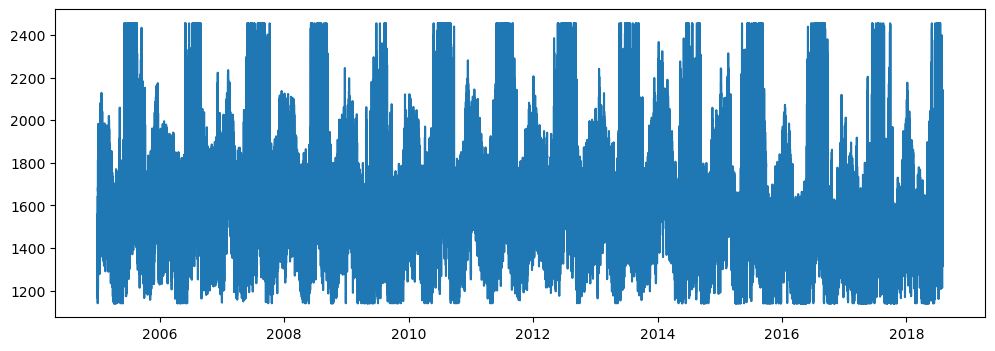

In [29]:
plt.figure(figsize=(12,4))
plt.plot(data.index,data["DUQ_MW"])
plt.show()

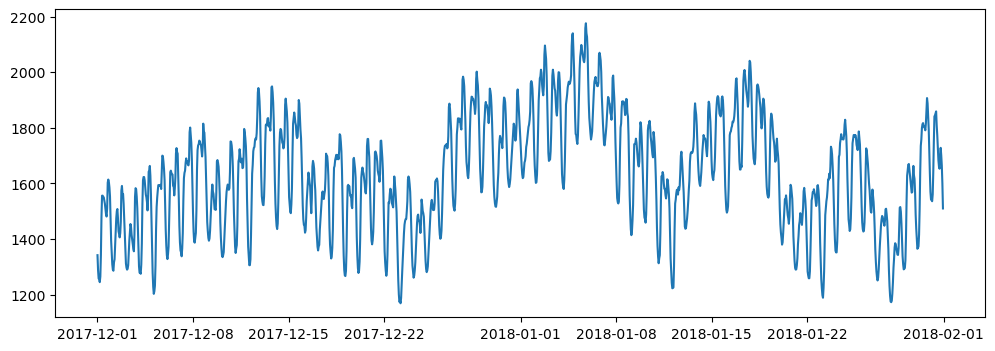

In [30]:
subset=data["2017-12":"2018-01"]
plt.figure(figsize=(12,4))
plt.plot(subset.index,subset["DUQ_MW"])
plt.show()

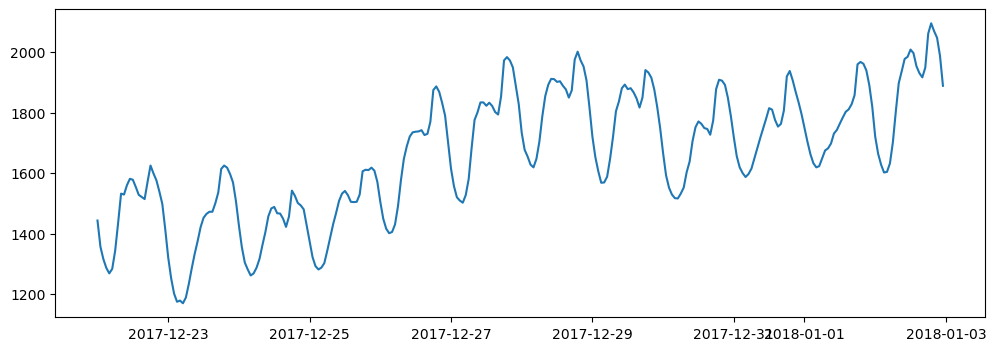

In [31]:
subset=data["2017-12-22":"2018-01-02"]
plt.figure(figsize=(12,4))
plt.plot(subset.index,subset["DUQ_MW"])
plt.show()

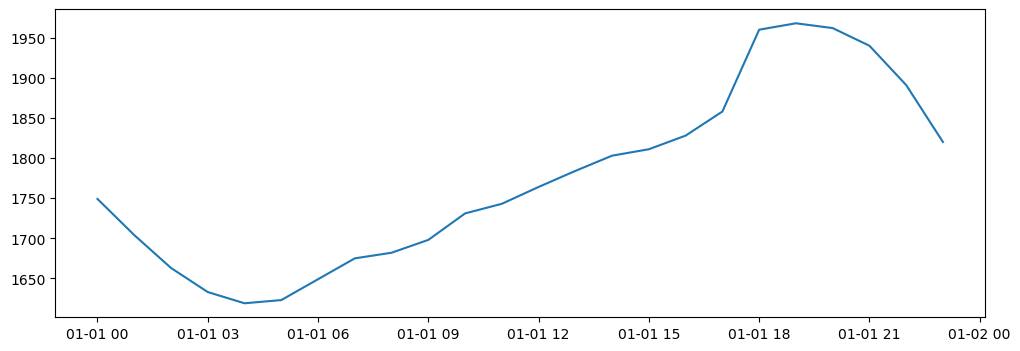

In [32]:
subset=data["2018-01-01 00:00:00":"2018-01-01 23:00:00"]
plt.figure(figsize=(12,4))
plt.plot(subset.index,subset["DUQ_MW"])
plt.show()

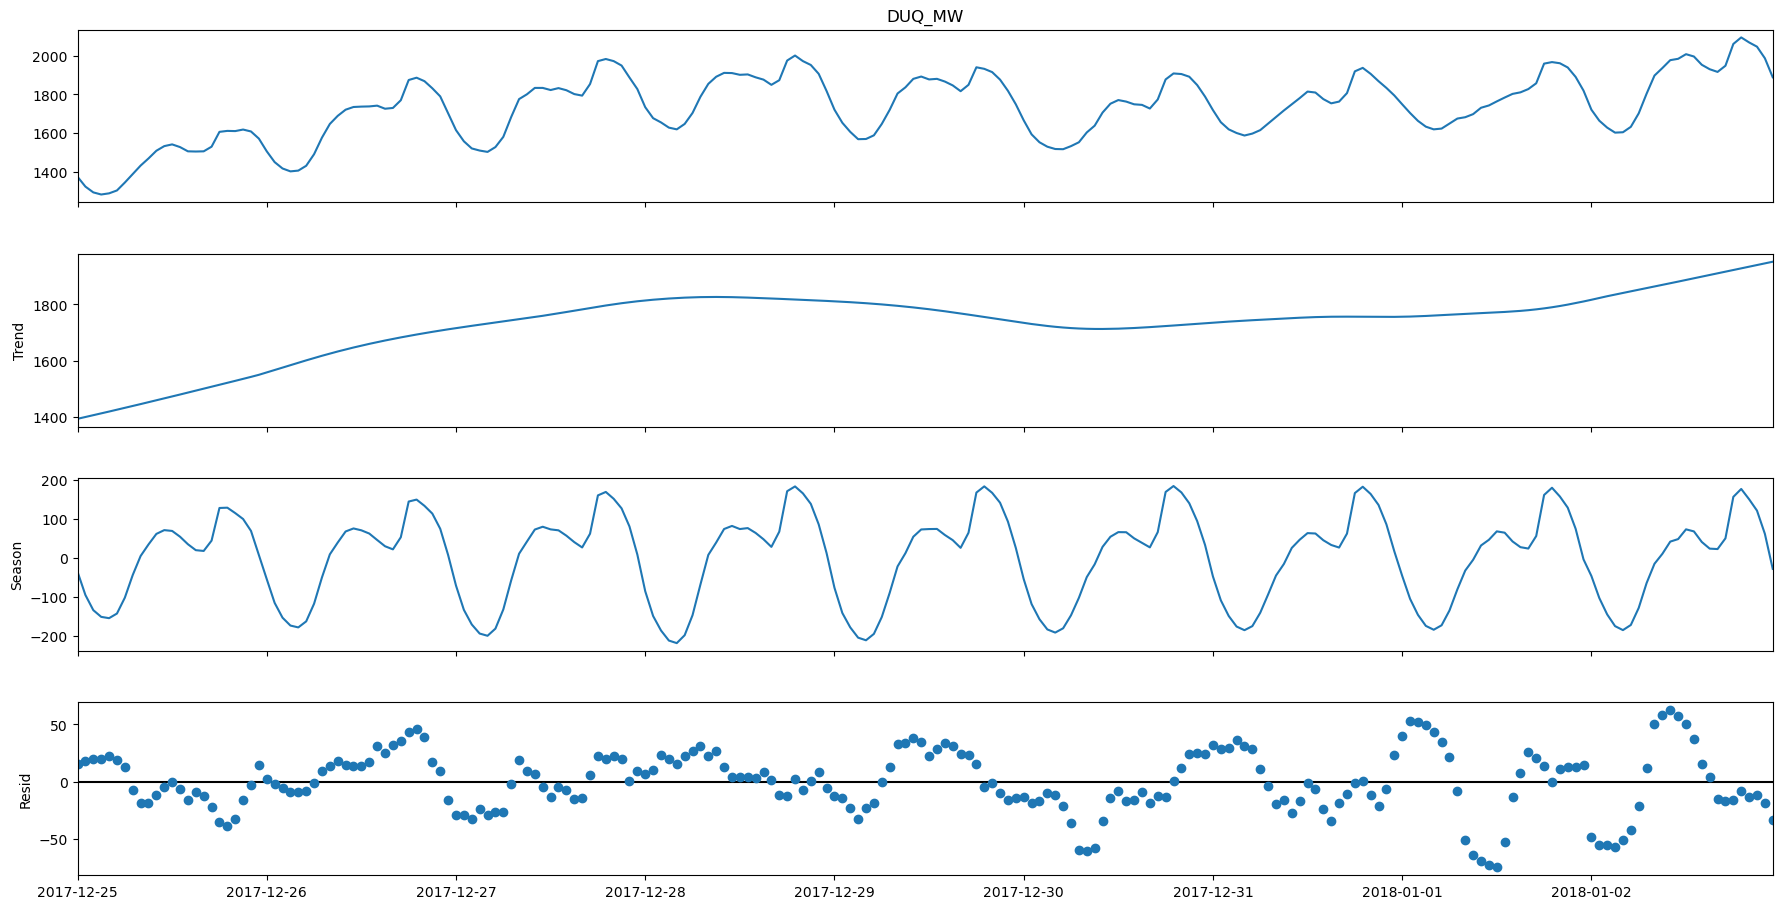

In [33]:
from statsmodels.tsa.seasonal import STL
subset_day=data["2017-12-25":"2018-01-02"]
stl_daily=STL(subset_day["DUQ_MW"],period=24)
res_daily=stl_daily.fit()
plot_daily=res_daily.plot()
plot_daily.set_size_inches(20,10)

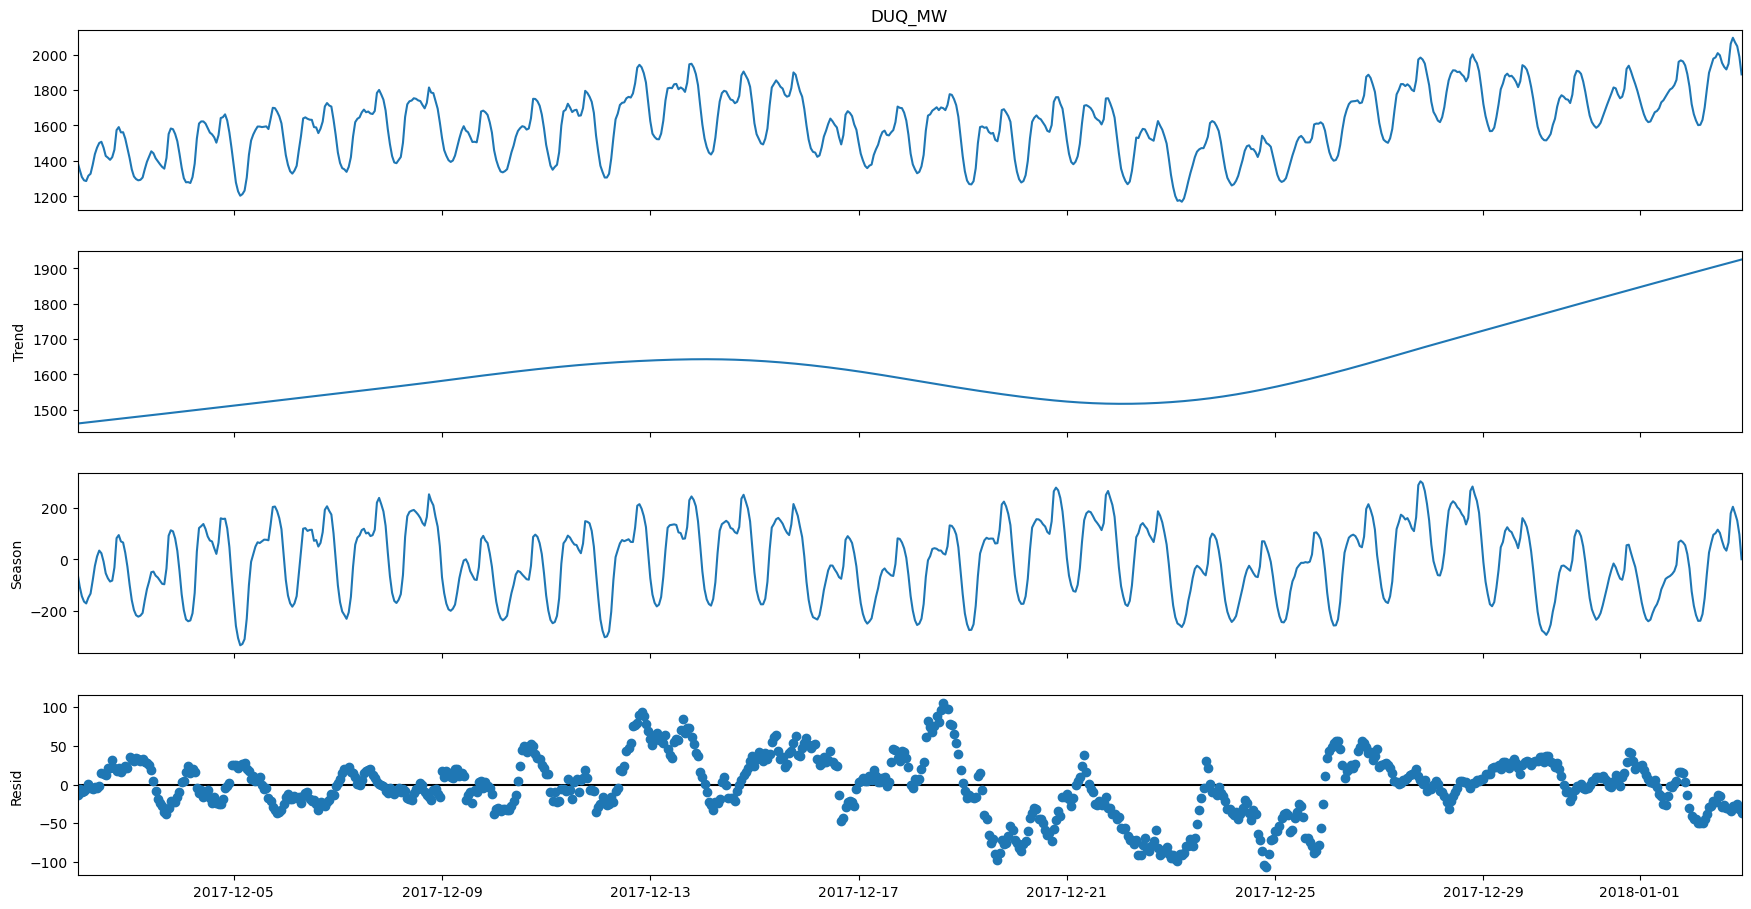

In [34]:
#STL in statsmodels take only 1 seasonal period at a time.Therefore we need to run multiple times for diff periods.
subset_weekly=data["2017-12-02":"2018-01-02"]
stl_weekly=STL(subset_weekly["DUQ_MW"],period=168)
res_weekly=stl_weekly.fit()
plot_weekly=res_weekly.plot()
plot_weekly.set_size_inches(20,10)

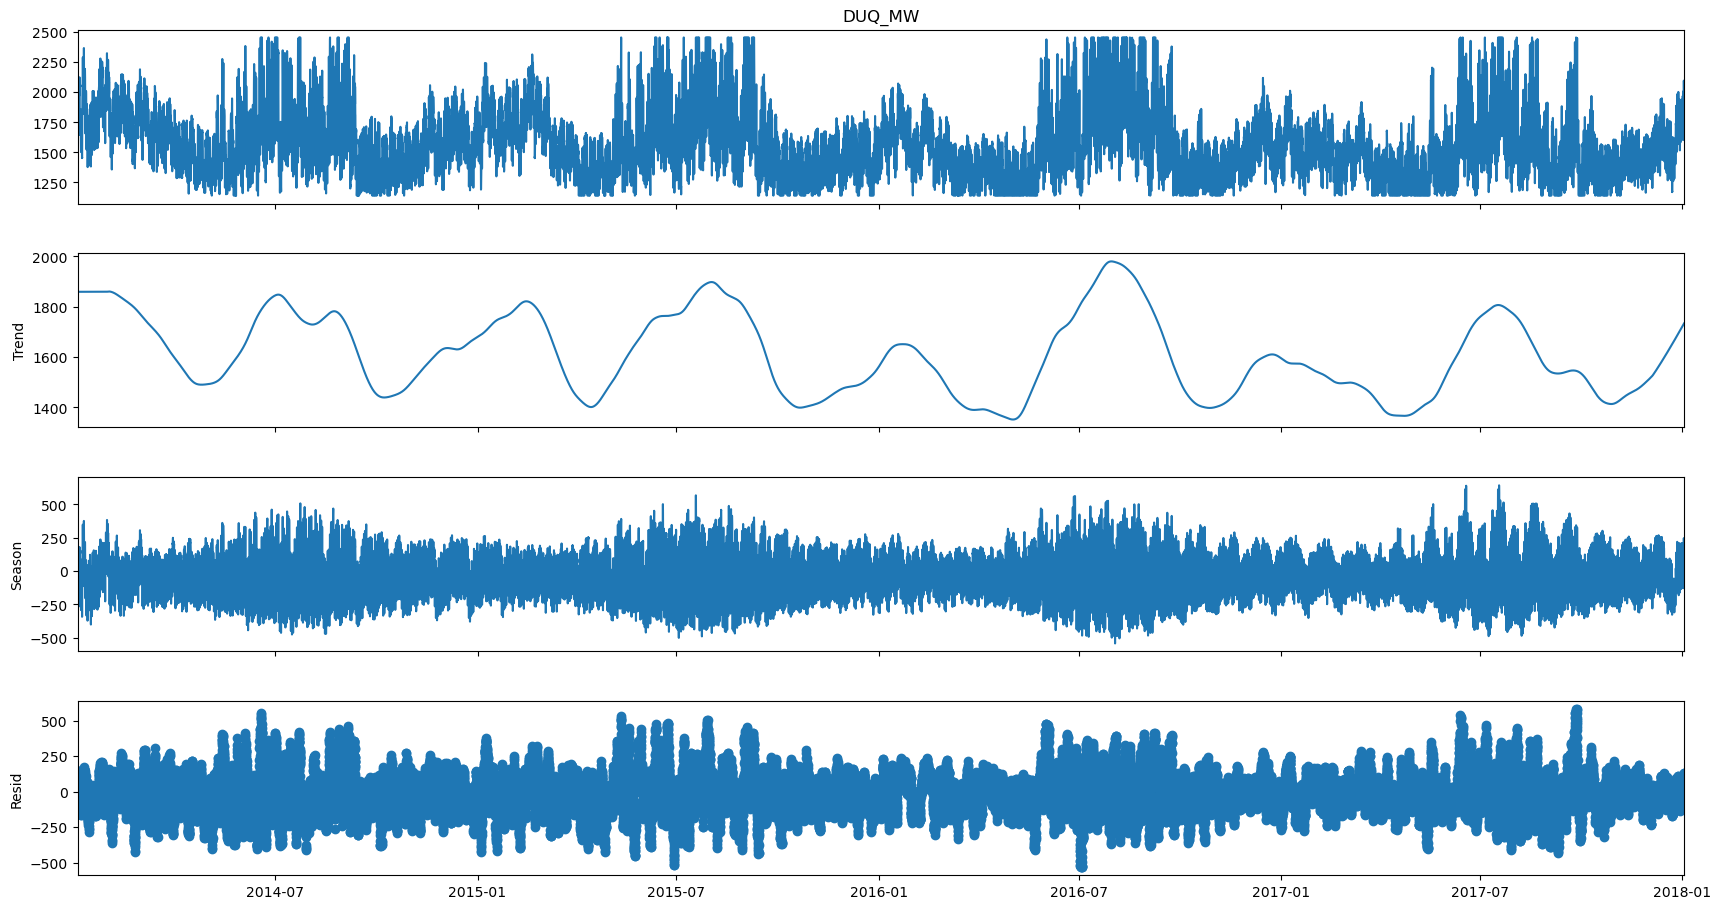

In [35]:
subset_monthly=data["2014-01-02":"2018-01-02"]
stl_monthly=STL(subset_monthly["DUQ_MW"],period=720)
res_monthly=stl_monthly.fit()
plot_monthly=res_monthly.plot()
plot_monthly.set_size_inches(20,10)

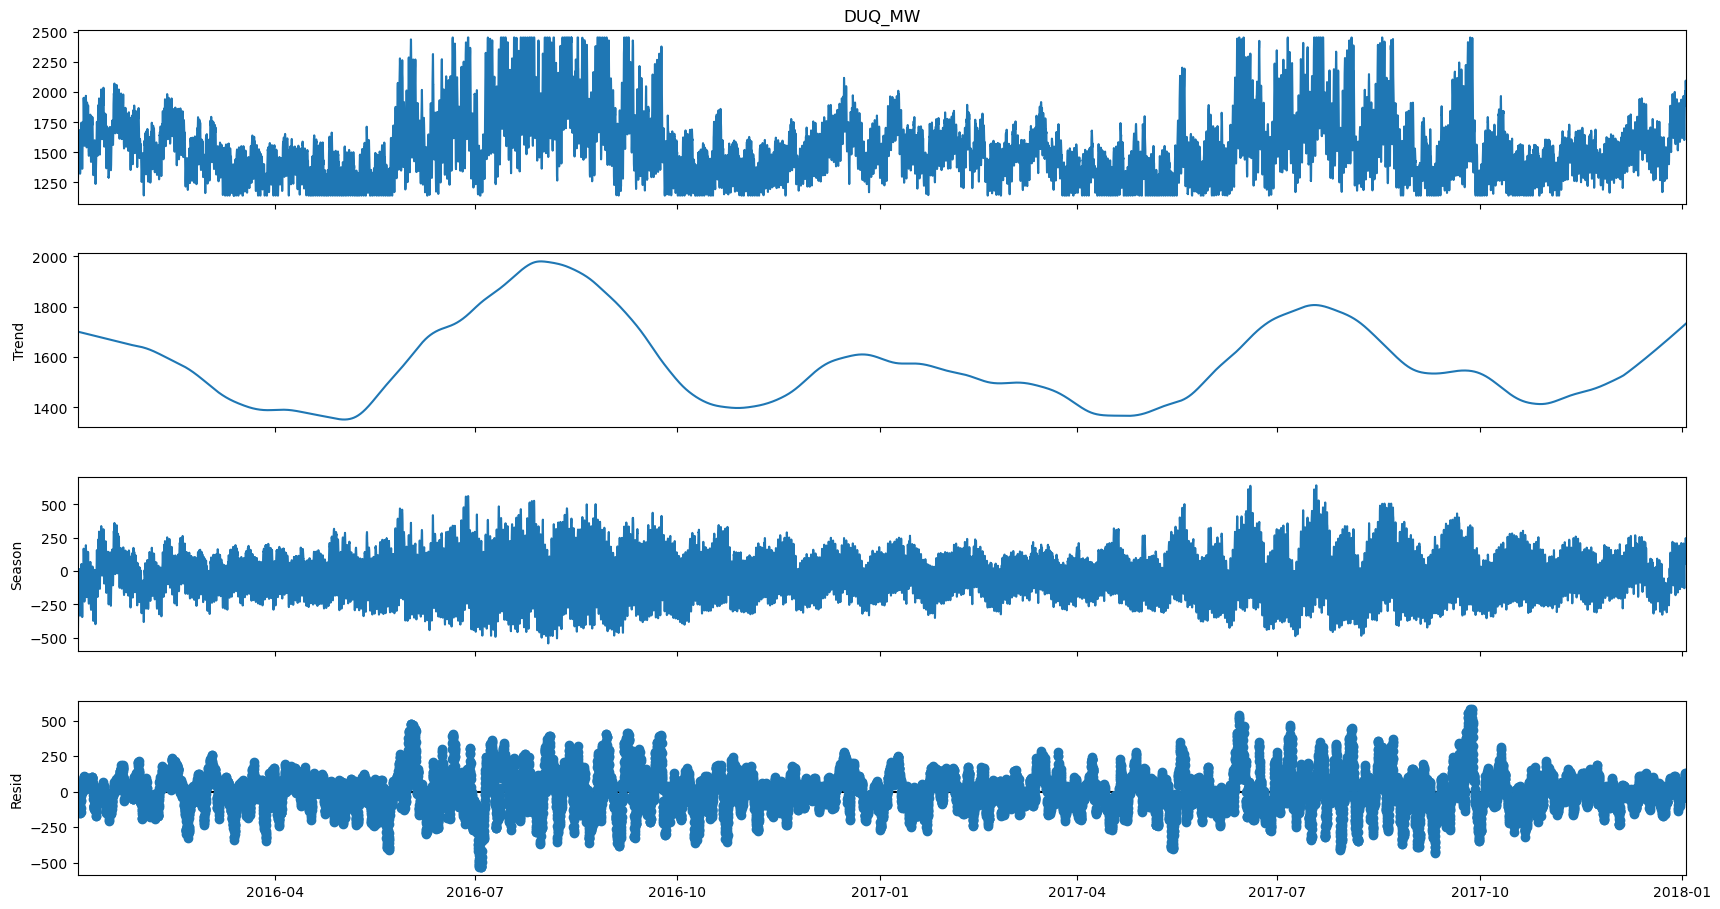

In [36]:
subset_monthly=data["2016-01-02":"2018-01-02"]
stl_monthly=STL(subset_monthly["DUQ_MW"],period=720)
res_monthly=stl_monthly.fit()
plot_monthly=res_monthly.plot()
plot_monthly.set_size_inches(20,10)

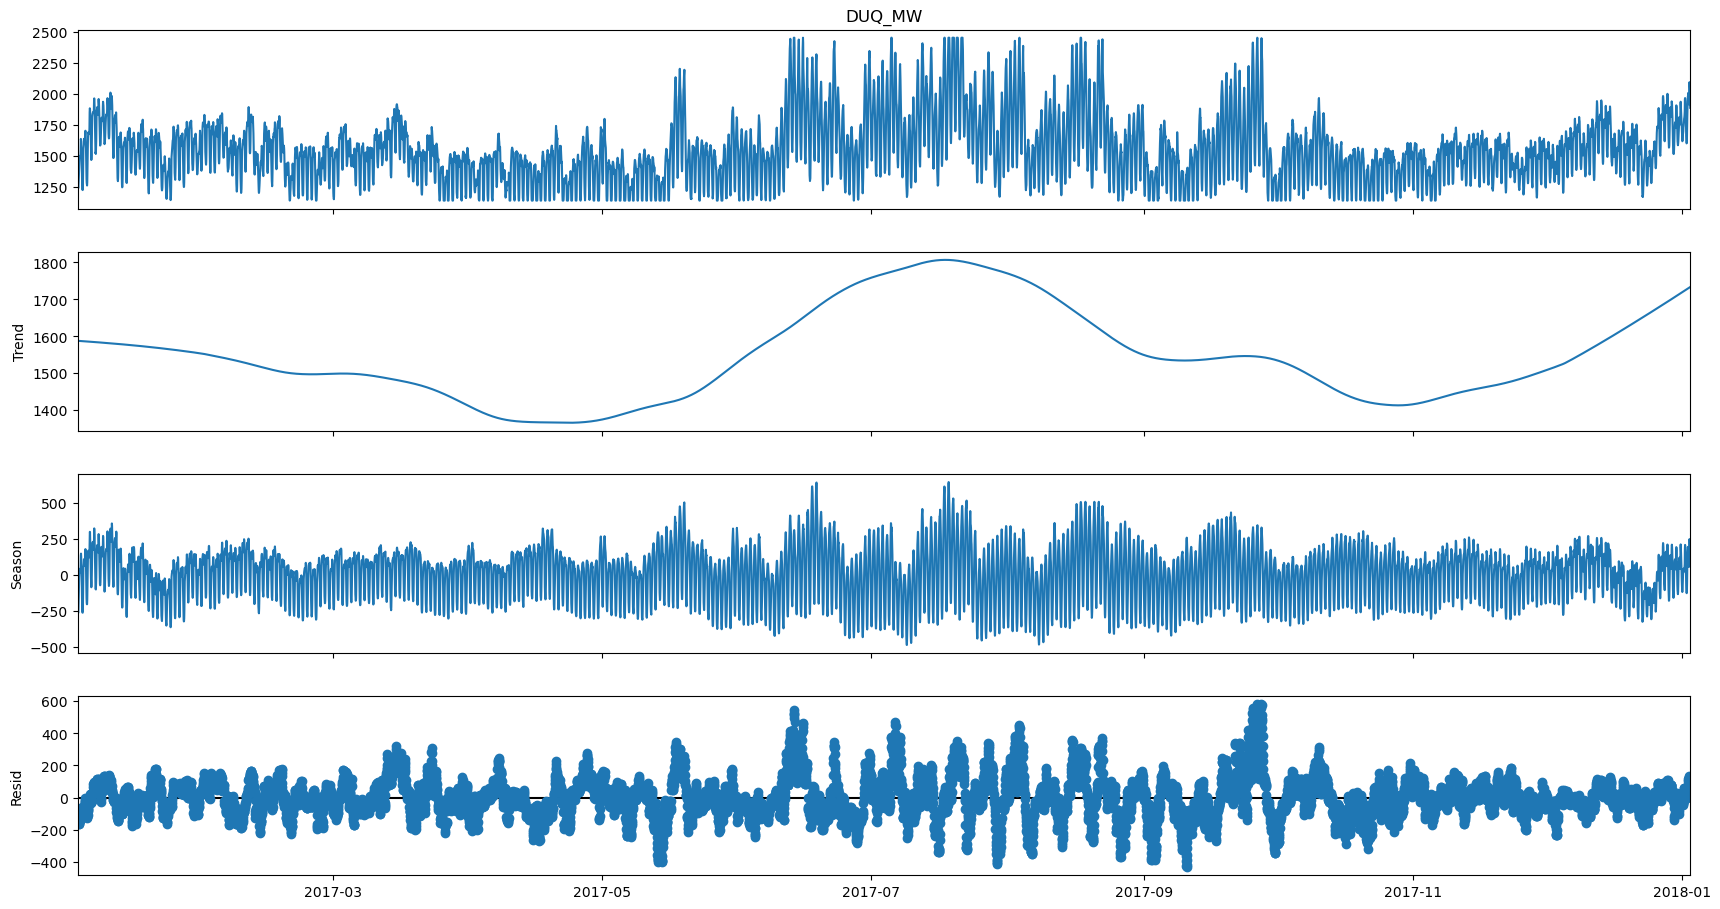

In [37]:
subset_monthly=data["2017-01-02":"2018-01-02"]
stl_monthly=STL(subset_monthly["DUQ_MW"],period=720)
res_monthly=stl_monthly.fit()
plot_monthly=res_monthly.plot()
plot_monthly.set_size_inches(20,10)

In [38]:
data["Hour"]=data.index.hour

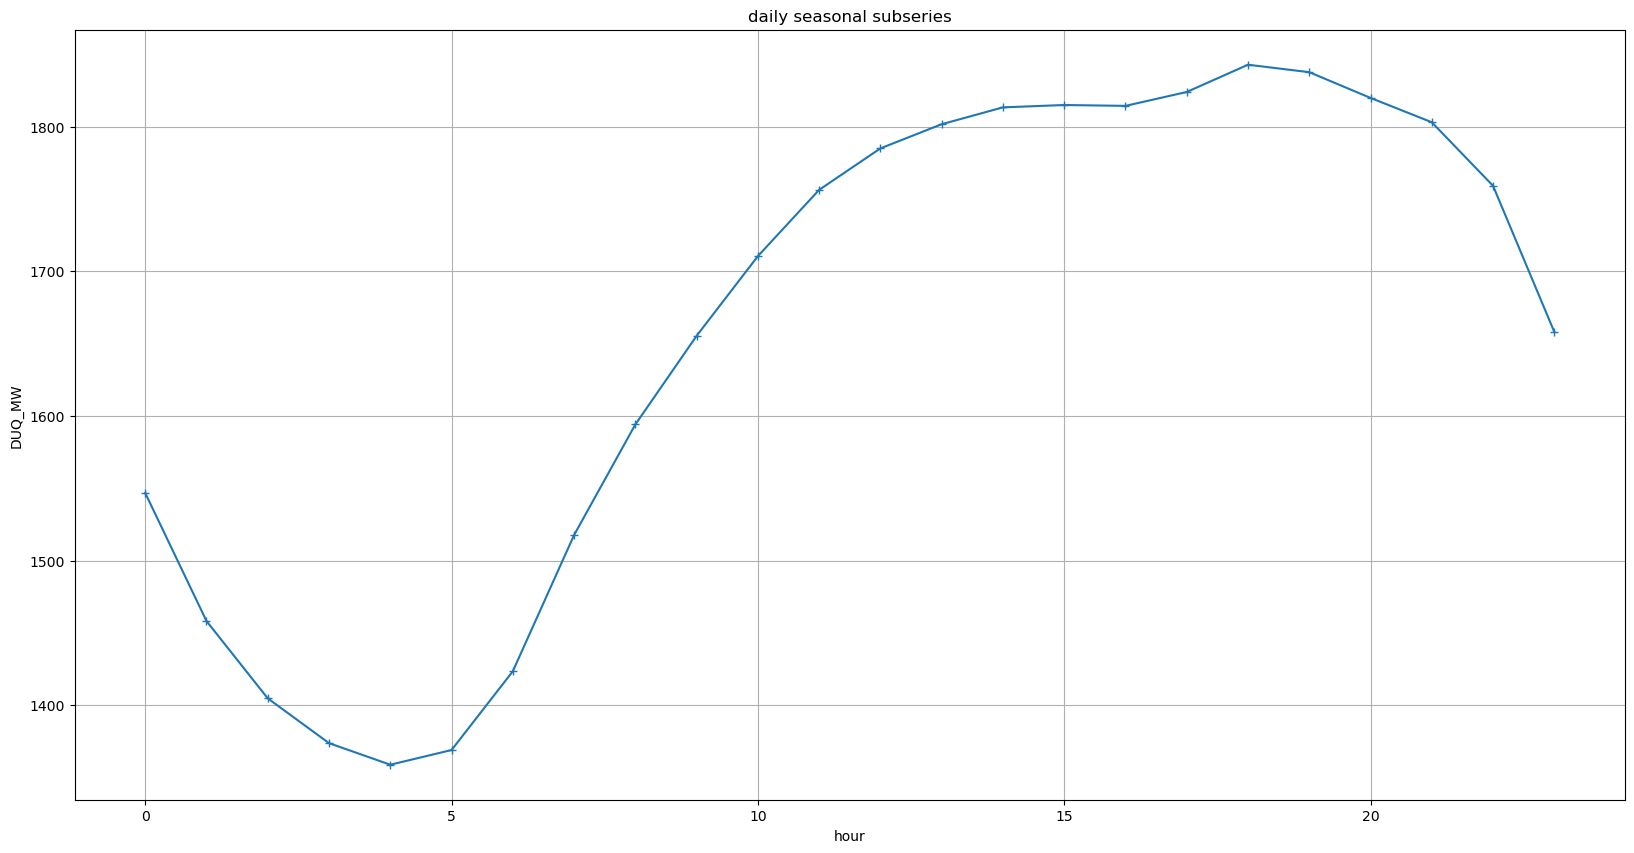

In [39]:
#seasonal subseries plot for each hour in a day
plt.figure(figsize=(20,10))
data.groupby('Hour')["DUQ_MW"].mean().plot(marker='+')
plt.title("daily seasonal subseries")
plt.xlabel("hour")
plt.ylabel("DUQ_MW")
plt.grid(True)
plt.show()

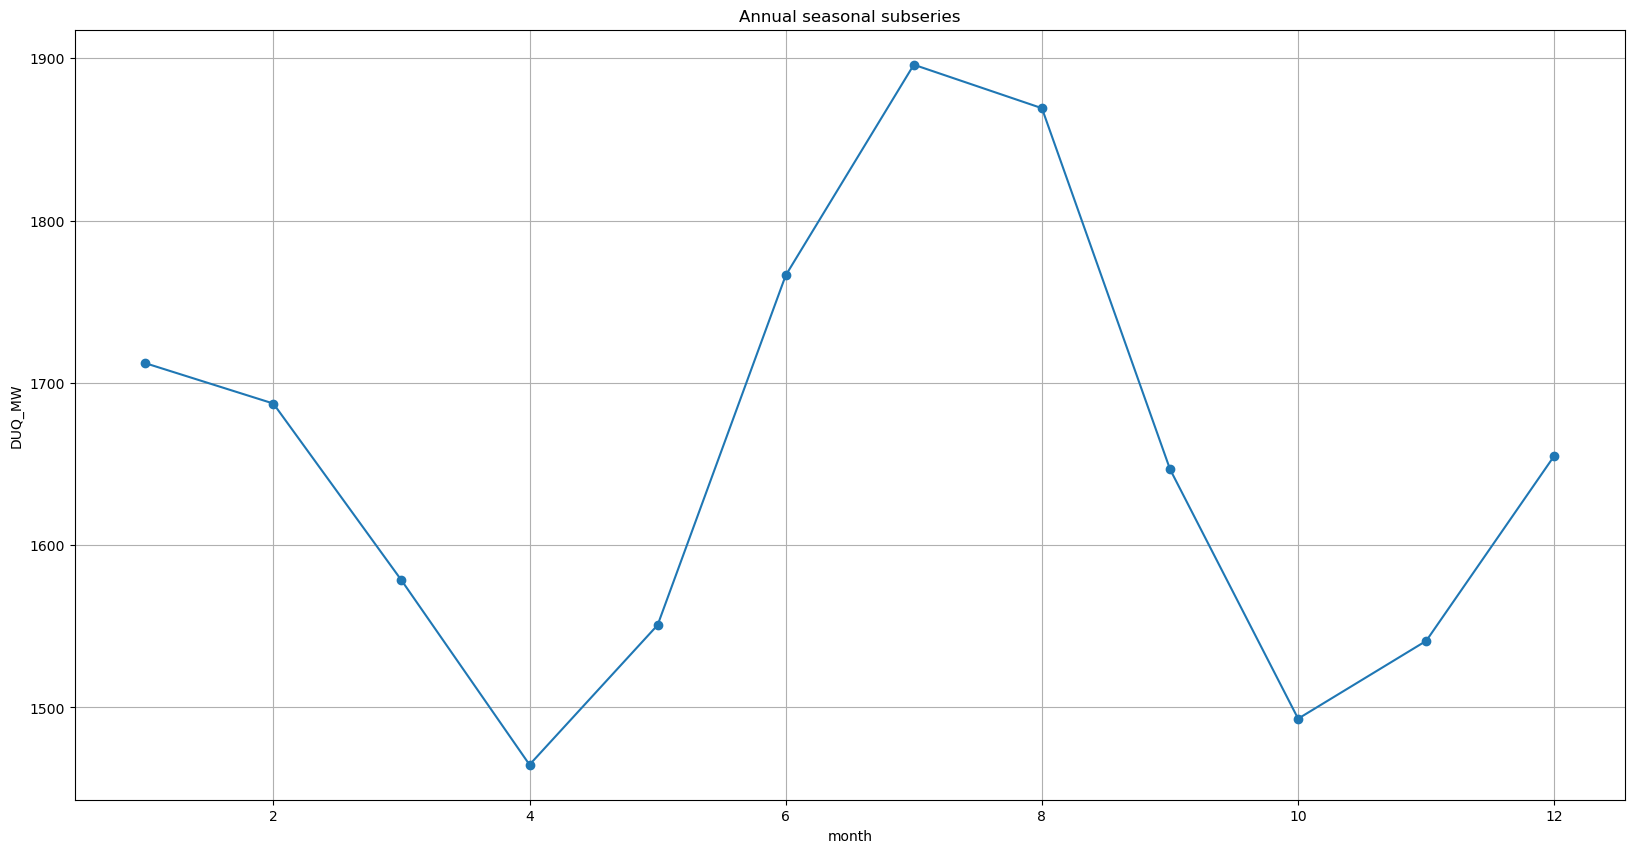

In [40]:
#seasonal subseries plot for each month in a year
plt.figure(figsize=(20,10))
data.groupby('month')["DUQ_MW"].mean().plot(marker='o')
plt.title("Annual seasonal subseries")
plt.xlabel("month")
plt.ylabel("DUQ_MW")
plt.grid(True)
plt.show()

In [41]:
from statsmodels.tsa.stattools import adfuller
adf_test=adfuller(data["DUQ_MW"])
print("ADF p_value:",adf_test[1])

ADF p_value: 4.553961036867644e-30


In [42]:
from statsmodels.tsa.stattools import kpss
kpss_test=kpss(data["DUQ_MW"],regression='c',nlags='auto')
print("KPSS p_value:",kpss_test[1])

KPSS p_value: 0.01


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6888\3975425736.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test=kpss(data["DUQ_MW"],regression='c',nlags='auto')


In [43]:
#since ADF says our series is "stationay" but KPSS tells us its "non stationary"-means our data is "trend-stationary". 

In [44]:
data_diff=data["DUQ_MW"].diff().dropna()

In [45]:
from statsmodels.tsa.stattools import adfuller
adf_test=adfuller(data_diff)
print("ADF p_value:",adf_test[1])

ADF p_value: 0.0


In [46]:
from statsmodels.tsa.stattools import kpss
kpss_test=kpss(data_diff,regression='c',nlags='auto')
print("KPSS p_value:",kpss_test[1])

KPSS p_value: 0.1


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6888\3638975404.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test=kpss(data_diff,regression='c',nlags='auto')


In [47]:
#building baseline model
train_size=int(len(data)*0.8)
train=data.iloc[:train_size]
test=data.iloc[train_size:]
y_train=train["DUQ_MW"]
y_test=test["DUQ_MW"]
naive_forecast=y_train.iloc[-1]
y_pred_naive=[naive_forecast]*len(test)
y_pred_naive[:10]

[1438.0,
 1438.0,
 1438.0,
 1438.0,
 1438.0,
 1438.0,
 1438.0,
 1438.0,
 1438.0,
 1438.0]

In [48]:
#seasonal_naive
season_length=7
seasonal_naive_forecast=y_train.iloc[-season_length:].tolist()*(len(test)//season_length+1)
y_pred_seasonal_naive=seasonal_naive_forecast[:len(test)]
y_pred_seasonal_naive[:10]

[1368.0,
 1434.0,
 1470.0,
 1477.0,
 1463.0,
 1458.0,
 1438.0,
 1368.0,
 1434.0,
 1470.0]

In [49]:
from sklearn.metrics import mean_squared_error
naive_error=np.sqrt(mean_squared_error(y_test,y_pred_naive))
print("naive_error:",naive_error)
seasonal_error=np.sqrt(mean_squared_error(y_test,y_pred_seasonal_naive))
print("seasonal_error:",seasonal_error)

naive_error: 316.96455243939846
seasonal_error: 316.35815141923973


In [50]:
#model building
split_date="2017-01-02"
train=data.loc[:split_date,"DUQ_MW"]
test=data.loc[split_date:,"DUQ_MW"]

In [51]:
train

Datetime
2005-01-01 01:00:00    1364.0
2005-01-01 02:00:00    1273.0
2005-01-01 03:00:00    1218.0
2005-01-01 04:00:00    1170.0
2005-01-01 05:00:00    1166.0
                        ...  
2017-01-02 19:00:00    1628.0
2017-01-02 20:00:00    1617.0
2017-01-02 21:00:00    1571.0
2017-01-02 22:00:00    1518.0
2017-01-02 23:00:00    1435.0
Freq: h, Name: DUQ_MW, Length: 105239, dtype: float64

In [52]:
test

Datetime
2017-01-02 00:00:00    1378.0
2017-01-02 01:00:00    1316.0
2017-01-02 02:00:00    1268.0
2017-01-02 03:00:00    1247.0
2017-01-02 04:00:00    1240.0
                        ...  
2018-08-02 20:00:00    1966.0
2018-08-02 21:00:00    1944.0
2018-08-02 22:00:00    1901.0
2018-08-02 23:00:00    1789.0
2018-08-03 00:00:00    1656.0
Freq: h, Name: DUQ_MW, Length: 13873, dtype: float64

In [53]:
train_diff=train.diff().dropna()

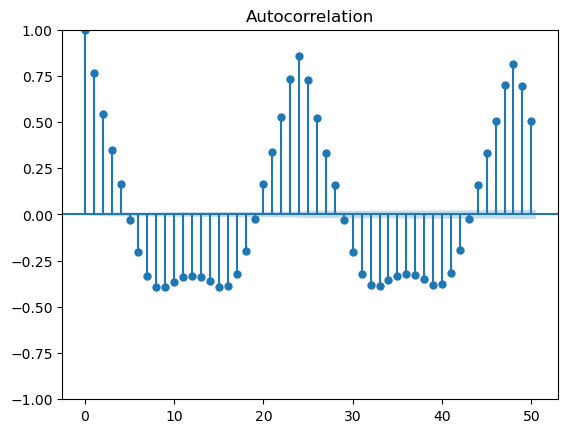

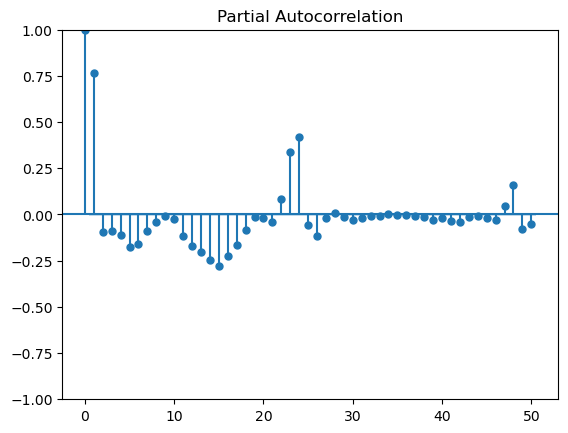

In [54]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(train_diff,lags=50)
plot_pacf(train_diff,lags=50)
plt.show()

In [55]:
from statsmodels.tsa.arima.model import ARIMA
p,d,q=1,1,1        #found using acf and pacf plots
arima_model=ARIMA(train,order=(p,d,q))
arima_fit=arima_model.fit()
forecast_arima=arima_fit.forecast(steps=len(test))
forecast_arima[:10]

2017-01-03 00:00:00    1370.535888
2017-01-03 01:00:00    1323.926867
2017-01-03 02:00:00    1290.227483
2017-01-03 03:00:00    1265.862062
2017-01-03 04:00:00    1248.245308
2017-01-03 05:00:00    1235.507993
2017-01-03 06:00:00    1226.298625
2017-01-03 07:00:00    1219.640042
2017-01-03 08:00:00    1214.825735
2017-01-03 09:00:00    1211.344881
Freq: h, Name: predicted_mean, dtype: float64

In [56]:
rmse_arima=np.sqrt(mean_squared_error(test,forecast_arima))
rmse_arima

455.095020291521

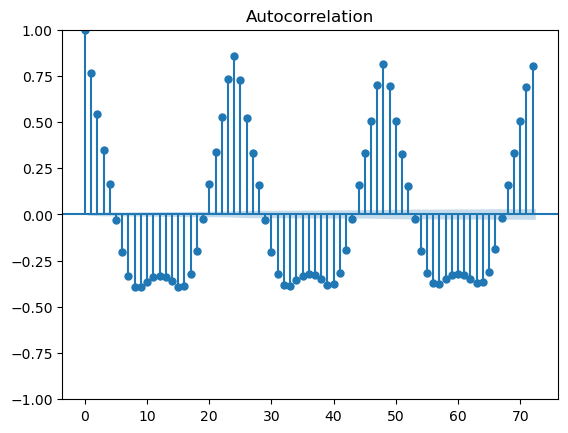

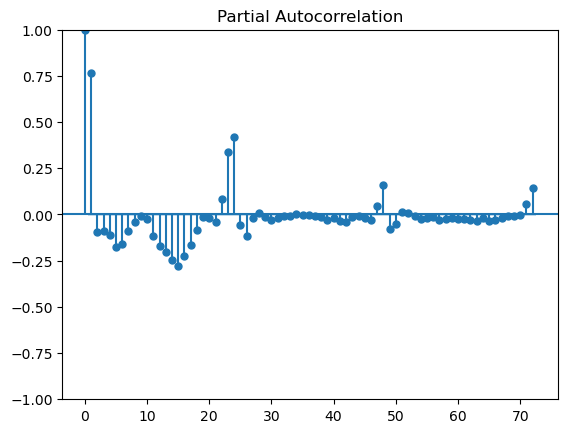

In [57]:
plot_acf(train_diff,lags=24*3)
plot_pacf(train_diff,lags=24*3)
plt.show()

In [58]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [59]:
train_slice=train["2016-04-02":"2016-08-02"]

In [60]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima_model=SARIMAX(train_slice,order=(1,1,1),seasonal_order=(1,0,1,7))
sarima_fit=sarima_model.fit()
pred_sarima=sarima_fit.get_forecast(steps=len(test))
forecast_sarima=pred_sarima.predicted_mean
forecast_sarima.index=test.index
forecast_sarima[:5]

Datetime
2017-01-02 00:00:00    1921.196885
2017-01-02 01:00:00    1797.600352
2017-01-02 02:00:00    1701.220477
2017-01-02 03:00:00    1634.619723
2017-01-02 04:00:00    1584.809385
Freq: h, Name: predicted_mean, dtype: float64

In [61]:
test[:5]

Datetime
2017-01-02 00:00:00    1378.0
2017-01-02 01:00:00    1316.0
2017-01-02 02:00:00    1268.0
2017-01-02 03:00:00    1247.0
2017-01-02 04:00:00    1240.0
Freq: h, Name: DUQ_MW, dtype: float64

In [62]:
print(test.index.equals(forecast_sarima.index))

True


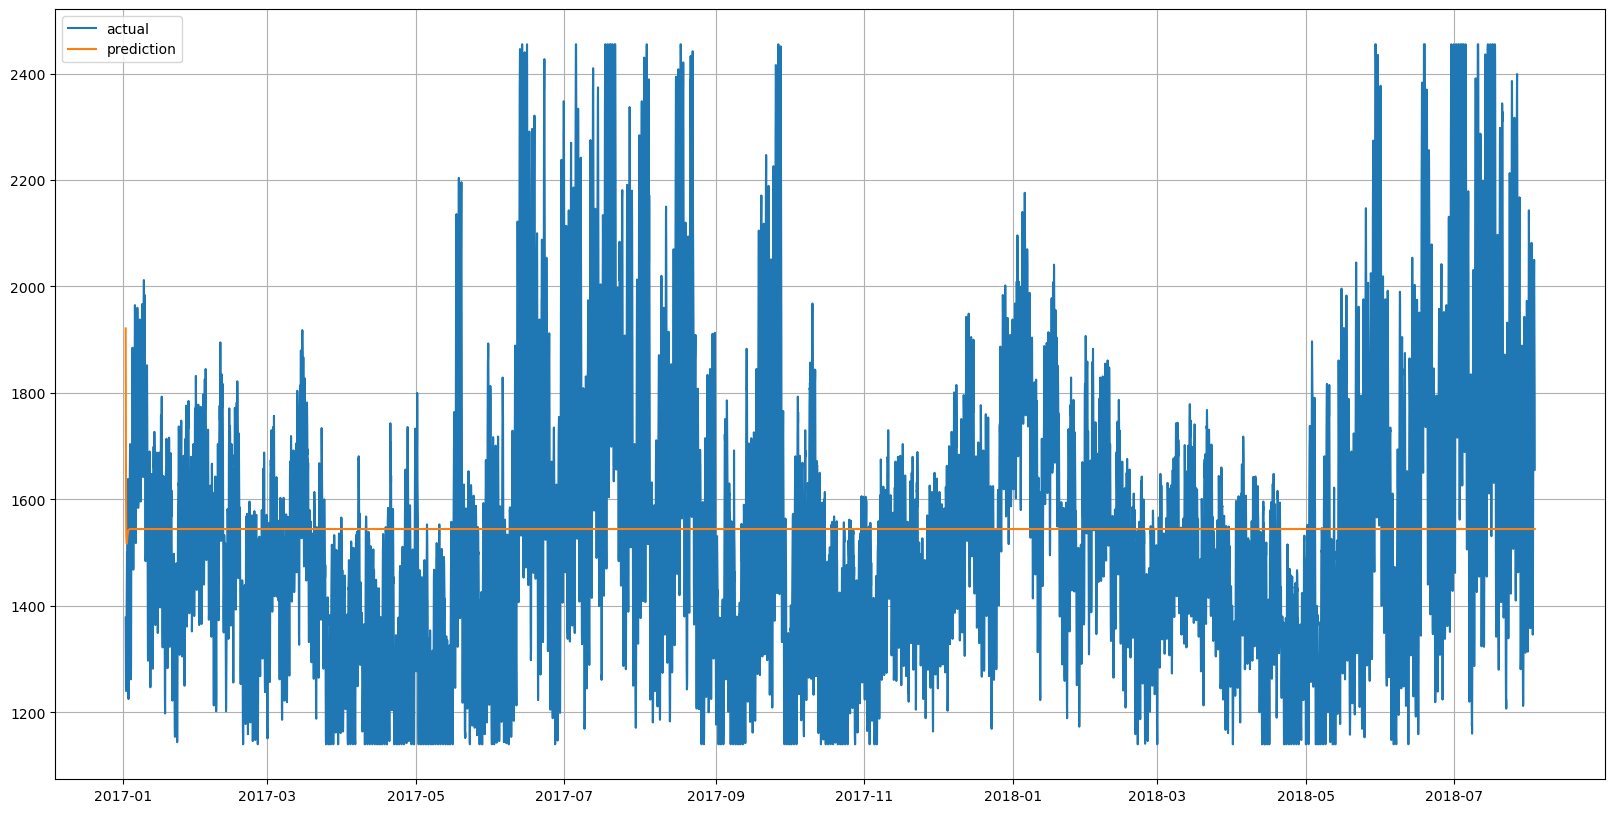

In [63]:
plt.figure(figsize=(20,10))
plt.plot(test,label='actual')
plt.plot(forecast_sarima,label='prediction')
plt.grid(True)
plt.legend()
plt.show()

In [64]:
rmse_sarima=np.sqrt(mean_squared_error(test,forecast_sarima))
rmse_sarima

275.99728484510854

In [65]:
from pmdarima import auto_arima
auto_model=auto_arima(train_slice,seasonal=True,m=7,start_p=0,start_q=0,start_P=0,start_Q=0,d=1,D=0,max_p=1,max_q=1,max_P=1,max_Q=1,stepwise=True,trace=True)
forecast_auto=auto_model.predict(n_periods=len(test))
forecast_auto.index=test.index
forecast_auto[:10]

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=33311.412, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=29360.776, Time=1.06 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=30461.202, Time=1.05 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=33309.464, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=29423.066, Time=0.26 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=29330.378, Time=1.21 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=29340.204, Time=0.71 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=32323.782, Time=1.10 sec
 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=29229.543, Time=1.86 sec
 ARIMA(1,1,1)(0,0,1)[7] intercept   : AIC=29234.349, Time=0.93 sec
 ARIMA(1,1,1)(1,0,0)[7] intercept   : AIC=29244.901, Time=0.99 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=29286.910, Time=0.55 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=30439.443, Time=2.18 sec
 ARIMA(1,1,1)(1,0,1)[7]             : AIC=29227.543, Time=0.82 sec
 ARIMA(1,1,1)(0,0,1

Datetime
2017-01-02 00:00:00    1921.196885
2017-01-02 01:00:00    1797.600352
2017-01-02 02:00:00    1701.220477
2017-01-02 03:00:00    1634.619723
2017-01-02 04:00:00    1584.809385
2017-01-02 05:00:00    1546.309535
2017-01-02 06:00:00    1533.916702
2017-01-02 07:00:00    1527.702056
2017-01-02 08:00:00    1522.651213
2017-01-02 09:00:00    1518.768086
Freq: h, dtype: float64

In [66]:
rmse_auto_arima=np.sqrt(mean_squared_error(test,forecast_auto))
rmse_auto_arima

275.99728484510854

In [67]:
from sklearn.metrics import mean_absolute_error
mae_sarima=mean_absolute_error(test,forecast_sarima)
mae_auto=mean_absolute_error(test,forecast_auto)
print("mae_sarima:",mae_sarima)
print("mae_auto:",mae_auto)

mae_sarima: 208.60970830601707
mae_auto: 208.60970830601707


In [68]:
data

,DUQ_MW,year,month,weekday,Hour
Datetime,,,,,
2005-01-01 01:00:00,1364.0,2005,1,5,1
2005-01-01 02:00:00,1273.0,2005,1,5,2
2005-01-01 03:00:00,1218.0,2005,1,5,3
2005-01-01 04:00:00,1170.0,2005,1,5,4
2005-01-01 05:00:00,1166.0,2005,1,5,5
...,...,...,...,...,...
2018-08-02 20:00:00,1966.0,2018,8,3,20
2018-08-02 21:00:00,1944.0,2018,8,3,21
2018-08-02 22:00:00,1901.0,2018,8,3,22


In [69]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [70]:
from prophet import Prophet
train_slice=train["2005-01-02":"2014-01-02"]
train_prophet=train_slice.reset_index()
train_prophet.columns=['ds','y']
test_prophet=test.reset_index()
test_prophet.columns=['ds','y']

In [71]:
prophet_model=Prophet(yearly_seasonality=True,weekly_seasonality=True,daily_seasonality=False)
prophet_model.fit(train_prophet)

00:55:34 - cmdstanpy - INFO - Chain [1] start processing
00:56:20 - cmdstanpy - INFO - Chain [1] done processing


In [72]:
prophet_forecast=prophet_model.predict(test_prophet[['ds']])
prophet_forecast[:5]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-02 00:00:00,1614.233766,1230.754409,1814.753245,1614.233766,1614.233766,-99.347058,-99.347058,-99.347058,-61.624278,-61.624278,-61.624278,-37.722780,-37.722780,-37.722780,0.0,0.0,0.0,1514.886708
1,2017-01-02 01:00:00,1614.231287,1233.521891,1847.169149,1614.231287,1614.231287,-91.825075,-91.825075,-91.825075,-54.173763,-54.173763,-54.173763,-37.651312,-37.651312,-37.651312,0.0,0.0,0.0,1522.406213
2,2017-01-02 02:00:00,1614.228809,1230.151578,1817.791953,1614.228809,1614.228809,-84.359074,-84.359074,-84.359074,-46.781155,-46.781155,-46.781155,-37.577919,-37.577919,-37.577919,0.0,0.0,0.0,1529.869735
3,2017-01-02 03:00:00,1614.226330,1245.820776,1836.506753,1614.226330,1614.226330,-76.987287,-76.987287,-76.987287,-39.484684,-39.484684,-39.484684,-37.502603,-37.502603,-37.502603,0.0,0.0,0.0,1537.239043
4,2017-01-02 04:00:00,1614.223852,1244.545761,1858.748119,1614.223852,1614.223852,-69.745992,-69.745992,-69.745992,-32.320625,-32.320625,-32.320625,-37.425367,-37.425367,-37.425367,0.0,0.0,0.0,1544.477860


In [73]:
test[:5]

Datetime
2017-01-02 00:00:00    1378.0
2017-01-02 01:00:00    1316.0
2017-01-02 02:00:00    1268.0
2017-01-02 03:00:00    1247.0
2017-01-02 04:00:00    1240.0
Freq: h, Name: DUQ_MW, dtype: float64

In [74]:
rmse_prophet=np.sqrt(mean_squared_error(test_prophet["y"],prophet_forecast["yhat"]))
mae_prophet=mean_absolute_error(test_prophet["y"],prophet_forecast["yhat"])
print("rmse_prophet:",rmse_prophet)
print("mae_prophet:",mae_prophet)

rmse_prophet: 245.64143331217872
mae_prophet: 188.73905191503317


In [75]:
from sklearn.metrics import r2_score
r2_prophet=r2_score(test_prophet["y"],prophet_forecast["yhat"])
r2_prophet

0.20307363133574974

In [76]:
data

,DUQ_MW,year,month,weekday,Hour
Datetime,,,,,
2005-01-01 01:00:00,1364.0,2005,1,5,1
2005-01-01 02:00:00,1273.0,2005,1,5,2
2005-01-01 03:00:00,1218.0,2005,1,5,3
2005-01-01 04:00:00,1170.0,2005,1,5,4
2005-01-01 05:00:00,1166.0,2005,1,5,5
...,...,...,...,...,...
2018-08-02 20:00:00,1966.0,2018,8,3,20
2018-08-02 21:00:00,1944.0,2018,8,3,21
2018-08-02 22:00:00,1901.0,2018,8,3,22


In [77]:
data.reset_index(inplace=True)
data

,Datetime,DUQ_MW,year,month,weekday,Hour
0,2005-01-01 01:00:00,1364.0,2005,1,5,1
1,2005-01-01 02:00:00,1273.0,2005,1,5,2
2,2005-01-01 03:00:00,1218.0,2005,1,5,3
3,2005-01-01 04:00:00,1170.0,2005,1,5,4
4,2005-01-01 05:00:00,1166.0,2005,1,5,5
...,...,...,...,...,...,...
119083,2018-08-02 20:00:00,1966.0,2018,8,3,20
119084,2018-08-02 21:00:00,1944.0,2018,8,3,21
119085,2018-08-02 22:00:00,1901.0,2018,8,3,22
119086,2018-08-02 23:00:00,1789.0,2018,8,3,23


In [78]:
print(data.index.name)
print(data.columns.tolist())

None
['Datetime', 'DUQ_MW', 'year', 'month', 'weekday', 'Hour']


In [79]:
data.drop("Datetime",axis=1,inplace=True)
data

,DUQ_MW,year,month,weekday,Hour
0,1364.0,2005,1,5,1
1,1273.0,2005,1,5,2
2,1218.0,2005,1,5,3
3,1170.0,2005,1,5,4
4,1166.0,2005,1,5,5
...,...,...,...,...,...
119083,1966.0,2018,8,3,20
119084,1944.0,2018,8,3,21
119085,1901.0,2018,8,3,22
119086,1789.0,2018,8,3,23


In [80]:
from sklearn.preprocessing import StandardScaler,FunctionTransformer

In [81]:
from sklearn.compose import ColumnTransformer

In [82]:
def same(x):
    return(x)

In [83]:
passthrough=FunctionTransformer(same)

In [84]:
passthrough_cols=["year","month","weekday","Hour"]

In [85]:
preprocessor=ColumnTransformer([("pass",passthrough,passthrough_cols)])
preprocessor

ColumnTransformer(transformers=[('pass',
                                 FunctionTransformer(func=<function same at 0x00000245216414E0>),
                                 ['year', 'month', 'weekday', 'Hour'])])

In [86]:
X=data.drop("DUQ_MW",axis=1)
y=data["DUQ_MW"]

In [87]:
X

,year,month,weekday,Hour
0,2005,1,5,1
1,2005,1,5,2
2,2005,1,5,3
3,2005,1,5,4
4,2005,1,5,5
...,...,...,...,...
119083,2018,8,3,20
119084,2018,8,3,21
119085,2018,8,3,22
119086,2018,8,3,23


In [88]:
y

0         1364.0
1         1273.0
2         1218.0
3         1170.0
4         1166.0
           ...  
119083    1966.0
119084    1944.0
119085    1901.0
119086    1789.0
119087    1656.0
Name: DUQ_MW, Length: 119088, dtype: float64

In [89]:
X_transformed=preprocessor.fit_transform(X)
X_transformed

array([[2005,    1,    5,    1],
       [2005,    1,    5,    2],
       [2005,    1,    5,    3],
       ...,
       [2018,    8,    3,   22],
       [2018,    8,    3,   23],
       [2018,    8,    4,    0]])

In [90]:
X_transformed.shape

(119088, 4)

In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_transformed,y,test_size=0.2,random_state=43)

In [92]:
len(X_train)

95270

In [93]:
len(y_train)

95270

In [94]:
len(X_test)

23818

In [95]:
len(y_test)

23818

In [96]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [97]:
lr_pred_train=lr.predict(X_train)
lr_pred_train[:5]

array([1780.82558514, 1641.53284898, 1489.5564275 , 1634.18162849,
       1919.57786182])

In [98]:
y_train[:5]

12424    1924.0
11577    1646.0
79999    1685.0
71387    2002.0
4265     2455.0
Name: DUQ_MW, dtype: float64

In [99]:
y_pred_lr=lr.predict(X_test)
y_pred_lr[:5]

array([1471.97663497, 1717.05339266, 1528.40502448, 1810.64347035,
       1789.70357073])

In [100]:
y_test[:5]

105887    1460.0
104917    1755.0
18821     1637.0
14131     1800.0
29653     1673.0
Name: DUQ_MW, dtype: float64

In [101]:
rmse_lr=np.sqrt(mean_squared_error(y_test,y_pred_lr))
mae_lr=mean_absolute_error(y_test,y_pred_lr)
r2_lr=r2_score(y_test,y_pred_lr)
print("rmse_lr:",rmse_lr)
print("mae_lr:",mae_lr)
print("r2_lr",r2_lr)

rmse_lr: 246.65748748495136
mae_lr: 192.7727867785972
r2_lr 0.2844531208873945


In [102]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(criterion= 'squared_error', max_depth=26, max_features= None, min_samples_leaf= 573, min_samples_split=1135)
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=26, min_samples_leaf=573,
                      min_samples_split=1135)

In [103]:
dt_pred_train=dt.predict(X_train)
dt_pred_train[:10]

array([2104.44015826, 1678.48531952, 1478.75259516, 1841.98765432,
       2104.44015826, 1508.2550882 , 1689.63186222, 1952.01823282,
       1594.8238342 , 1609.869     ])

In [104]:
y_train[:10]

12424     1924.0
11577     1646.0
79999     1685.0
71387     2002.0
4265      2455.0
116397    1423.0
77419     1750.0
91787     2198.0
2614      1509.0
49128     1938.0
Name: DUQ_MW, dtype: float64

In [105]:
y_pred_dt=dt.predict(X_test)
y_pred_dt[:5]

array([1590.3808096 , 1683.66171004, 1452.02991453, 1999.74586466,
       1738.47272727])

In [106]:
y_test[:5]

105887    1460.0
104917    1755.0
18821     1637.0
14131     1800.0
29653     1673.0
Name: DUQ_MW, dtype: float64

In [107]:
rmse_dt=np.sqrt(mean_squared_error(y_test,y_pred_dt))
mae_dt=mean_absolute_error(y_test,y_pred_dt)
r2_dt=r2_score(y_test,y_pred_dt)
print("rmse_dt:",rmse_dt)
print("mae_dt:",mae_dt)
print("r2_dt",r2_dt)

rmse_dt: 160.8227440749246
mae_dt: 120.70893846474489
r2_dt 0.6958103582864432


In [108]:
from sklearn.model_selection import RandomizedSearchCV

In [109]:
from scipy.stats import uniform,randint

In [110]:
param_dist={
    "criterion":['squared_error','absolute_error'],
    "max_depth":randint(2,30),
    "min_samples_leaf":randint(500,1500),
    "min_samples_split":randint(1000,3000),
    "max_features":[None,0.5,'sqrt','log2']
}
random_search=RandomizedSearchCV(estimator=dt,param_distributions=param_dist,scoring="r2",cv=3,n_jobs=-1,verbose=1,random_state=43)
random_search.fit(X_train,y_train)
print("Best_params:",random_search.best_params_)
print("Best_score:",random_search.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best_params: {'criterion': 'squared_error', 'max_depth': 26, 'max_features': None, 'min_samples_leaf': 573, 'min_samples_split': 1135}
Best_score: 0.6801346152691936


In [111]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(max_depth= 26, max_features= None, min_samples_leaf= 573, min_samples_split= 1135, n_estimators= 2000)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=26, max_features=None, min_samples_leaf=573,
                      min_samples_split=1135, n_estimators=2000)

In [112]:
rf_pred_train=rf.predict(X_train)
rf_pred_train[:5]

array([2092.5410223 , 1672.62538715, 1348.45919039, 1855.1755909 ,
       2076.03268557])

In [113]:
y_train[:5]

12424    1924.0
11577    1646.0
79999    1685.0
71387    2002.0
4265     2455.0
Name: DUQ_MW, dtype: float64

In [114]:
y_pred_rf=rf.predict(X_test)
y_pred_rf[:5]

array([1527.05362819, 1627.89600076, 1447.94065784, 2016.94334634,
       1719.52684439])

In [115]:
y_test[:5]

105887    1460.0
104917    1755.0
18821     1637.0
14131     1800.0
29653     1673.0
Name: DUQ_MW, dtype: float64

In [116]:
rmse_rf=np.sqrt(mean_squared_error(y_test,y_pred_rf))
mae_rf=mean_absolute_error(y_test,y_pred_rf)
r2_rf=r2_score(y_test,y_pred_rf)
print("rmse_rf:",rmse_rf)
print("mae_rf:",mae_rf)
print("r2_rf",r2_rf)

rmse_rf: 163.8703216128108
mae_rf: 123.82344429643884
r2_rf 0.6841723874966554


In [117]:
param_dist={
    "n_estimators":(500,2000),
    "max_depth":randint(2,30),
    "min_samples_leaf":randint(500,1500),
    "min_samples_split":randint(1000,3000),
    "max_features":[None,0.5,'sqrt','log2']
}
random_search=RandomizedSearchCV(estimator=rf,param_distributions=param_dist,scoring="r2",cv=3,n_jobs=-1,verbose=1,random_state=43)
random_search.fit(X_train,y_train)
print("Best_params:",random_search.best_params_)
print("Best_score:",random_search.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best_params: {'max_depth': 26, 'max_features': None, 'min_samples_leaf': 573, 'min_samples_split': 1135, 'n_estimators': 2000}
Best_score: 0.6661932276910935


In [118]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [119]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [120]:
xgb_pred_train=xgb.predict(X_train)
xgb_pred_train[:5]

array([1997.2137, 1641.3685, 1532.6234, 1924.8138, 2257.2527],
      dtype=float32)

In [121]:
y_train[:5]

12424    1924.0
11577    1646.0
79999    1685.0
71387    2002.0
4265     2455.0
Name: DUQ_MW, dtype: float64

In [122]:
y_pred_xgb=xgb.predict(X_test)
y_pred_xgb[:5]

array([1449.86  , 1689.0177, 1597.796 , 2077.0132, 1726.7896],
      dtype=float32)

In [123]:
y_test[:5]

105887    1460.0
104917    1755.0
18821     1637.0
14131     1800.0
29653     1673.0
Name: DUQ_MW, dtype: float64

In [124]:
rmse_xgb=np.sqrt(mean_squared_error(y_test,y_pred_xgb))
mae_xgb=mean_absolute_error(y_test,y_pred_xgb)
r2_xgb=r2_score(y_test,y_pred_xgb)
print("rmse_xgb:",rmse_xgb)
print("mae_xgb:",mae_xgb)
print("r2_xgb",r2_xgb)

rmse_xgb: 136.03296189656052
mae_xgb: 99.17031299216737
r2_xgb 0.7823604628670449


In [125]:
param_dist={
    'n_estimators':randint(200,2000),
    'max_depth':randint(2,50),
    'learning_rate':uniform(0.01,0.2),
    'subsample':uniform(0.5,1),
    'colsample_bytree':uniform(0.5,1),
    'min_child_weight':randint(1,10),
    'gamma':uniform(0,5),
    'reg_alpha':uniform(0,5),
    'reg_lambda':uniform(0,5)
}
random_search=RandomizedSearchCV(xgb,param_distributions=param_dist,n_iter=50,scoring="r2",cv=3,verbose=1,n_jobs=-1,random_state=43)
random_search.fit(X_train,y_train)
print("Best parameters:",random_search.best_params_)
print("Best score:",random_search.best_score_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters: {'colsample_bytree': 0.5461680577085708, 'gamma': 1.633948525123912, 'learning_rate': 0.08115888526249847, 'max_depth': 9, 'min_child_weight': 6, 'n_estimators': 782, 'reg_alpha': 3.5637175323792625, 'reg_lambda': 2.0019411033557954, 'subsample': 0.9982908383266861}
Best score: 0.7696124076703597
